In [373]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')

In [376]:
iterations = 1000
matrixSize = np.arange(2, 11, 2)
n_tries_arr = defaultdict(list)

for n in matrixSize:
    print(n)
    for iteration in range(0, iterations):
        matrix = list(range(1, n+1)) + list(range(1, n+1))
        n_tries = 0
        seenNumbers = {}
        while sum(matrix):
            samples = np.random.choice(matrix, size = 2, replace = False)
            sample1, sample2 = samples
            #print("Matrix: {} Try number: {}".format(matrix, n_tries))
            if sample1 == 0 or sample2 == 0:
                continue
            elif sample1 == sample2:
                n_tries += 1
                matrix = [x if x != sample1 else 0 for x in matrix]
            else:
                index1 = matrix.index(sample1)
                index2 = matrix.index(sample2)
                n_tries += 1
                if index1 or index2 in seenNumbers:
                    n_tries -= 1
                elif index1 not in seenNumbers:
                    seenNumbers[index1] = sample1
                elif index2 not in seenNumbers:
                    seenNumbers[index2] = sample2
        n_tries_arr[n].append(n_tries)

2
4
6
8
10


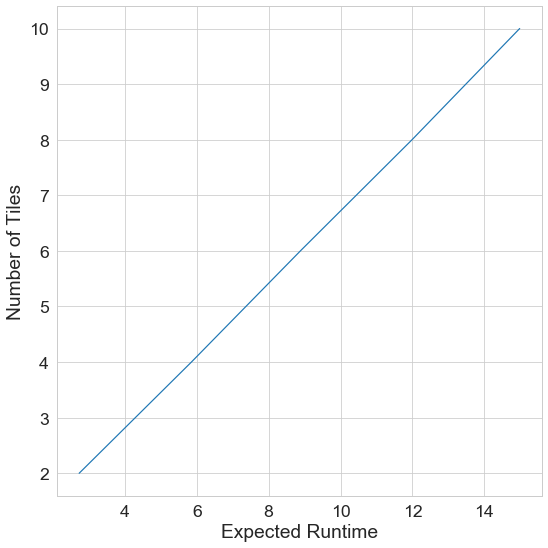

In [377]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([np.mean(n_tries_arr[x]) for x in matrixSize], matrixSize )
ax.set_xlabel('Expected Runtime')
ax.set_ylabel('Number of Tiles')
fig.tight_layout()